# Flight Price Predictor

## Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Loading the Dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [3]:
df['airline'].value_counts()

airline
Vistara      7906
Air_India    6831
Indigo       5538
GO_FIRST     4436
AirAsia      3016
SpiceJet     1633
Name: count, dtype: int64

## Data Visualization

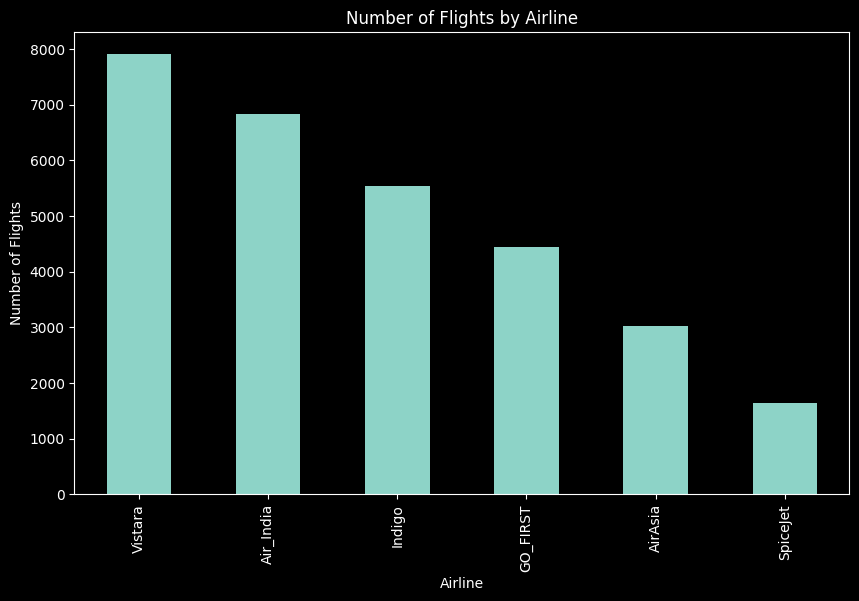

In [7]:
plt.figure(figsize=(10,6))
df['airline'].value_counts().plot(kind='bar')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()